In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [ ]:
df = pd.read_excel('E:/BRAC Tech/crmft/Copy of CRMFT_HH.xlsx')

In [ ]:
df.head()

In [ ]:
demog_df = df[['Gender','Age','Marital Status','Division','District','Thana/Upazila','Did You Migrate Here From Another Area?','Name of the Community','Religion']]

In [ ]:

demog_df

,Gender,Age,Marital Status,Division,District,Thana/Upazila,Did You Migrate Here From Another Area?,Name of the Community,Religion
0,Male,30.0,Married,Barisal,Bhola,Borhanuddin,No,Kritonia Bari,Islam
1,Female,30.0,Married,Barisal,Bhola,Borhanuddin,No,Kritonia Bari,Islam
2,Female,9.0,NaN,Barisal,Bhola,Borhanuddin,No,Kritonia Bari,Islam
3,Male,6.0,NaN,Barisal,Bhola,Borhanuddin,No,Kritonia Bari,Islam
4,Male,20.0,Married,Barisal,Bhola,Borhanuddin,No,Kritonia Bari,Islam


In [ ]:
df.rename(columns={'Did You Migrate Here From Another Area?':'Migrant Status','Name of the Community':'Community Name'})

In [ ]:
print_full(df)

In [ ]:
literacy_df = df[['Gender','Highest Level of Schooling Completed','Main Occupation','Types of Interested New Training']]

In [ ]:
literacy_df.head(20)

In [ ]:
pd.get_dummies(df['Highest Level of Schooling Completed'])

,BA/BSC/Fazil/Diploma/Honors,Don’t Know,Higher Secondary/HSC/Alim,Kawmi/Hafeji (Religious studies),Lower Secondary (Class 6-8),MA/MSc/MBBS/Kamil and above,Pre-primary,Primary (Class 1-5),Secondary/SSC/Dakhil,Signature Literacy Only,Uneducated or Never attended the school
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
32347,False,False,False,False,False,False,False,True,False,False,False
32348,False,False,False,False,True,False,False,False,False,False,False
32349,False,False,False,False,True,False,False,False,False,False,False
32350,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
pd.get_dummies(df['Types of Interested New Training'])

,"Batik, Block, Boutique, and Sewing","Batik, Block, Boutique, and Sewing; Beauty Parlor","Batik, Block, Boutique, and Sewing; Beauty Parlor; Computer Training","Batik, Block, Boutique, and Sewing; Beauty Parlor; Computer Training; Nursing Training","Batik, Block, Boutique, and Sewing; Beauty Parlor; Electronics Repairing (Refrigerators, TVs, Mobiles and Other Electronics)","Batik, Block, Boutique, and Sewing; Beauty Parlor; Electronics Repairing (Refrigerators, TVs, Mobiles and Other Electronics); Handicrafts","Batik, Block, Boutique, and Sewing; Beauty Parlor; Electronics Repairing (Refrigerators, TVs, Mobiles and Other Electronics); Hardware Related Work","Batik, Block, Boutique, and Sewing; Beauty Parlor; Electronics Repairing (Refrigerators, TVs, Mobiles and Other Electronics); Hardware Related Work; Handicrafts","Batik, Block, Boutique, and Sewing; Beauty Parlor; Electronics Repairing (Refrigerators, TVs, Mobiles and Other Electronics); Nursing Training","Batik, Block, Boutique, and Sewing; Beauty Parlor; Handicrafts",...,Welding; Hardware Related Work; Wooden Work; Driving,Welding; N/A,Welding; Unwilling to Receive Training,Welding; Wooden Work,Welding; Wooden Work; Driving,Wooden Work,Wooden Work; Driving,Wooden Work; Driving; Unwilling to Receive Training,Wooden Work; N/A,Wooden Work; Unwilling to Receive Training
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32347,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32349,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32350,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:


# Define 'Literate' and 'Interested' based on clarified logic
df['Literate'] = df['Highest Level of Schooling Completed'].notna() & ~df['Highest Level of Schooling Completed'].isin(["Uneducated or Never attended the school","Don' t Know",])
df['Interested'] = ~df['Types of Interested New Training'].isin(['Unwilling to Receive Training', 'N/A'])

# Create pivot table for heatmap
heatmap_data = df.pivot_table(
    index='Gender',
    columns='Literate',
    values='Interested',
    aggfunc='mean'
)

# Plot heatmap
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Proportion Interested in Training'})
plt.title('Great Interest in Training for uneducated people,minorities showing greater interest in working')
plt.xlabel('Literate')
plt.ylabel('Gender')
plt.show()


In [ ]:


# Define 'Literate' and 'Interested' based on clarified logic
df['Literate'] = df['Highest Level of Schooling Completed'].notna() & ~df['Highest Level of Schooling Completed'].isin(["Uneducated or Never attended the school","Don' t Know",])
df['Interested'] = ~df['Types of Interested New Training'].isin(['Unwilling to Receive Training', 'N/A'])
# Pivot table
heatmap_data = df.pivot_table(
    index='Did You Migrate Here From Another Area?',
    columns='Literate',
    values='Interested',
    aggfunc='mean'  # proportion of interested people
)

# Plot
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Proportion Interested in Training'})
plt.title('Natives have a greater literacy and interest in work, than non natives')
plt.xlabel('Literate')
plt.ylabel('Migrant Status')
plt.show()


In [ ]:
housing_df = df[["Community Household ID","Types of Household Land Ownership","Percentage of Homestead Total Land Area","Amount of Rent","Total Number of Rooms in The Household","Household Main Room Structure","Primary Room Current Condition"]]

In [ ]:
sanitation_df = df[['Community Household ID','Living Room Water-logging Status',"Type of Toilet Use","Cooking Fuel","Primary Source of Drinking Water","Source of Water for Other Purposes","Is there rainwater harvesting facilit.?","Drinking water collecting time (Min)?","Household to water source distance (Met)","Faced water scarity (months)"]]

In [ ]:
'Source of Household Income (Main Source)'


# Pivot table
heatmap_data = df.pivot_table(
    index='Did You Migrate Here From Another Area?',
    columns='Thana/Upazila',
    values='Household Monthly Income',
    aggfunc='mean'  # proportion of interested people
)

heatmap_display = heatmap_data / 1_000

# Plot
sns.heatmap(heatmap_data, annot=True, fmt=".1f",annot_kws={"fontsize":10},cmap="YlGnBu", cbar_kws={'label': 'Income'})
plt.title('')
plt.xlabel('Thana Upazila')
plt.ylabel('Migrant Status')
plt.show()




In [ ]:
'Source of Household Income (Main Source)'


# Pivot table
heatmap_data = df.pivot_table(
    index='Source of Household Income (Main Source)',
    columns='Thana/Upazila',
    values='Household Monthly Income',
    aggfunc='mean'  # proportion of interested people
)

heatmap_display = heatmap_data / 1_000

# Plot
sns.heatmap(heatmap_data, annot=True, fmt=".1f",annot_kws={"fontsize":10},cmap="YlGnBu", cbar_kws={'label': 'Income'})
plt.title('')
plt.xlabel('Thana Upazila')
plt.ylabel('Migrant Status')
plt.show()




In [ ]:
'Source of Household Income (Main Source)'


# Pivot table
heatmap_data = df.pivot_table(
    index='Source of Household Income (Main Source)',
    columns='Thana/Upazila',
    values='Household Monthly Income',
    aggfunc='mean'  # proportion of interested people
)

heatmap_display = heatmap_data / 1_000

# Plot
sns.heatmap(heatmap_data, annot=True, fmt=".1f",annot_kws={"fontsize":10},cmap="YlGnBu", cbar_kws={'label': 'Income'})
plt.title('')
plt.xlabel('Thana Upazila')
plt.ylabel('Migrant Status')
plt.show()




In [ ]:
City Corporation/Municipality	Name of the Community	Community Household ID	Household Member ID	Division	District	Thana/Upazila	Ward No.	Gender	Age	Marital Status	Religion	Relation with Head of Household	Are you suffering from any of the following diseases?  	Highest Level of Schooling Completed	Main Occupation	Disability Status	Reason for Not Going to School or Clg	Types of Training Received	Types of Interested New Training	Others diseases	Did You Migrate Here From Another Area?	MFS number Relationship	GPS (Latitude)	GPS (Longitude)	Main Cause of Migration	Migrated Due to a Natural Disaster	How Long Ago Did Your Family Migrate?	Years Have You Been Living Here?	Reason for Migration to This Slum	Types of Household Land Ownership	Percentage of Homestead Total Land Area	Living Room/Rental Status Ownership Type	Amount of Rent	Total Number of Rooms in The Household	Household Main Room Structure	Primary Room Current Condition	Living Room Water-logging Status	Type of Toilet Use	No. of Household Used The Toilet	Cooking Fuel	Primary Source of Drinking Water	Source of Water for Other Purposes	Source of Household Income (Main Source)	Household Monthly Expense	Household Food Expense	Household Fuel Expense	Household Utilities Expense	Household Education Expense	Household Transport Expense	Household Treatment Expense	Household Loan Repayement Expense	Household Others Expense	Household Monthly Income	Houehold Total Loan	Use of Loan	Source of Loan	Safety Net Support	Effected By Covid?	Brac Programme Service Received	Total Registered Household Members	Previous District	Previous Thana	Household Type	HH Head Main Occupation before Migration	HH Head Gender	Community Name	Digital Mobile Financial Service	No. of Disabled members	Total Registered Female Members	Total Registered Male Members	Total Registered Transgender Members	No. of Female Adolescent Members	No. of Child Members	VAWG Reporting Status	Current Household Migrate Status	No of Dependent Member (0 to 14 & 65+)	No. of income sources before migration	You or member search work to other area?	Is there rainwater harvesting facilit.?	Drinking water collecting time (Min)?	Household to water source distance (Met)	Faced water scarcity (months)	Has any member suffered any CC damage?	Water & Soil salinity increased thn bef?	Do you think it's hotter than ever?	Rainfall more frequent now than before?	Season change not happening right now?	Winter season is getting shorter?	Drought increase during the dry season?	Know about weather/disaster forecasting?	Take shelter during a cyclone/flooding/	Why not be able to take shelter?,Received early warning messages,Specific Reason for Migration,Where takes shelter during cyclones?,Mobile Costs (Internet+Talking),Secondary source of drinking water,Is the Household female headed?,Sum of Members Income,Avg. Monthly Income,No. of Child Male below 18,No. of Child Female below 18,No. of Child Transgender below 18,No. of Adolescents Male 13-19,No. of Adolescents Female 13-19,Houshold Per Capita,What is the current condition of drain?,Members suffered water borne diseases,Members suffered mentioned diseases?,Child or maternal mortality last 5 yrs?,Feeling first came to your community?,Mental stress due to Social issues?,Mental stress due to economic issues?,Mental stress due to environment issues?,Seek help societal and family issues?,Place of origin/ Birthplace of the House,Which generations lived here,Do you want to return to your origin?,Reason for Not return to the origin


In [ ]:
print(f"Index 1 shows us the number of unique households: {pd.get_dummies(df['Community Household ID']).shape}")

Index 1 shows us the number of unique households: (32352, 8883)


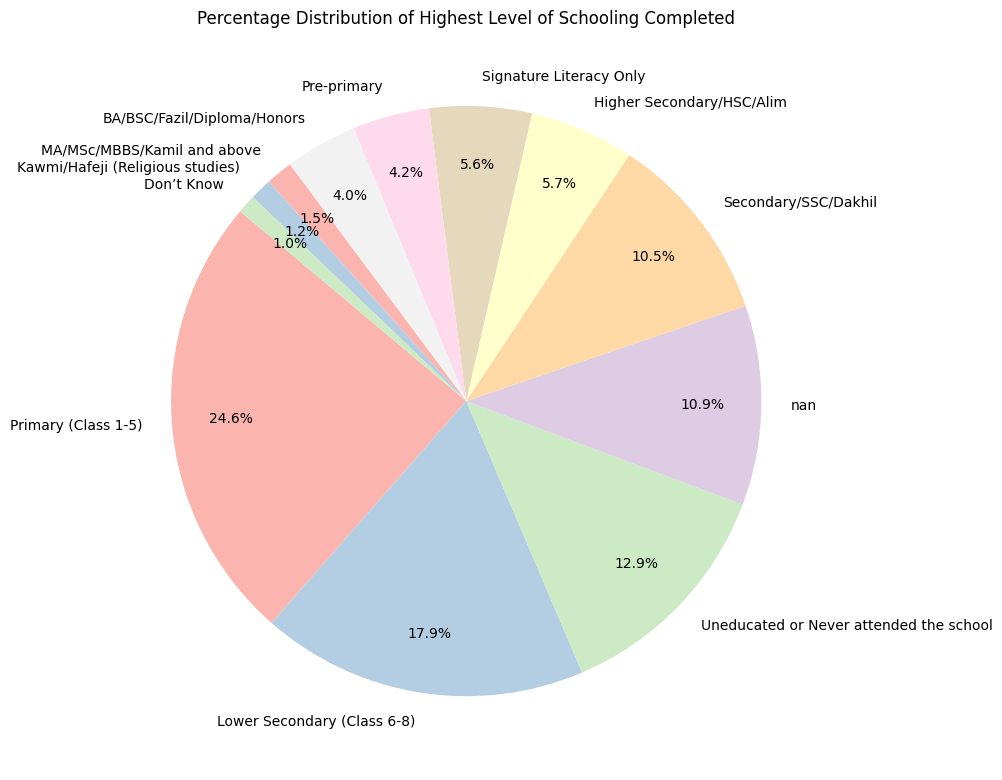

In [ ]:


# Replace with your target column
'''col = 'Gender'


counts = df[col].value_counts(dropna=False)
percentages = (counts / counts.sum()) * 100'''

# ---------- PIE CHART ----------
# Use same filtered_df and percentages from above

# Pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    percentages.values,
    labels=percentages.index.astype(str),
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.8,       # brings % labels in closer
    labeldistance=1.1,     # pushes labels out slightly
    colors=plt.cm.Pastel1.colors
)
plt.title(f'Percentage Distribution of {col}')
plt.tight_layout()
plt.show()



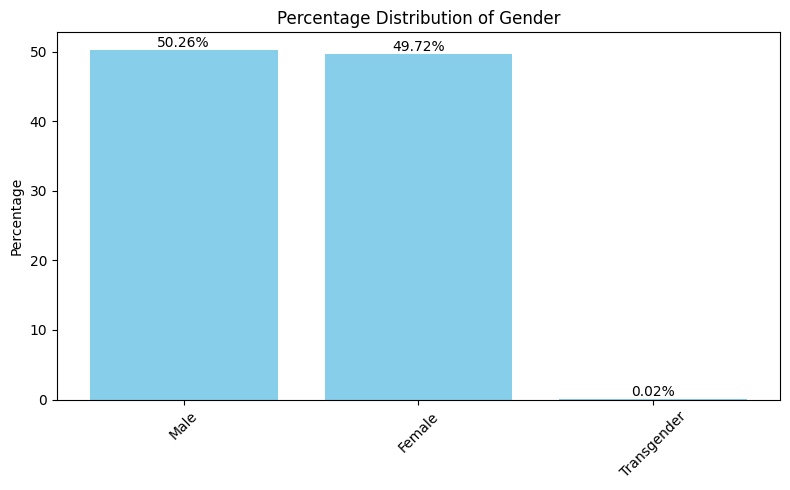

In [ ]:
col = 'Gender'


counts = df[col].value_counts(dropna=False)
percentages = (counts / counts.sum()) * 100

plt.figure(figsize=(8, 5))
bars = plt.bar(percentages.index.astype(str), percentages.values, color='skyblue')
plt.title(f'Percentage Distribution of {col}')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add labels on top
for bar, pct in zip(bars, percentages.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

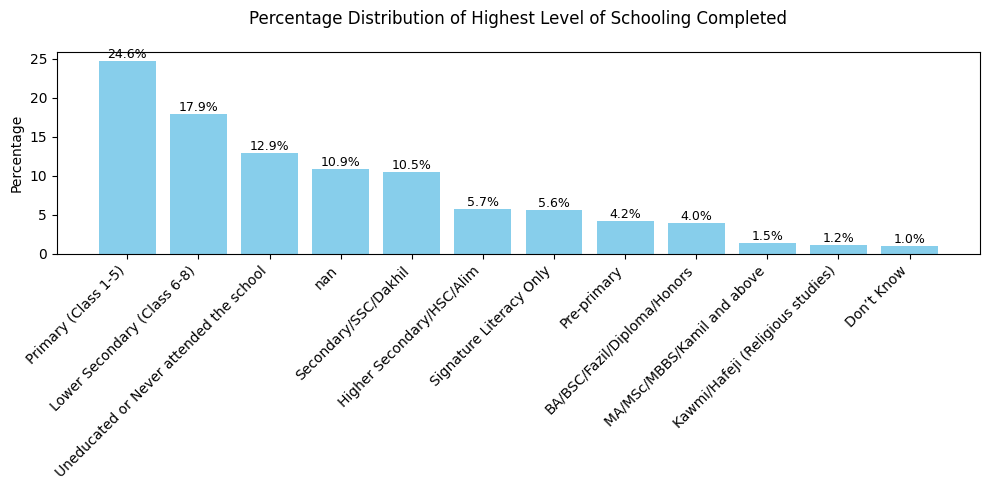

In [ ]:
col = 'Highest Level of Schooling Completed'
ignore_classes = ['', "Don' t Know"]  # or set to []

# Filter out ignored classes
filtered_df = df[~df[col].isin(ignore_classes)]

# Value counts & percentages
counts = filtered_df[col].value_counts(dropna=False)
percentages = (counts / counts.sum()) * 100

# Bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(percentages.index.astype(str), percentages.values, color='skyblue')
plt.title(f'Percentage Distribution of {col}', pad=20)
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Add labels
for bar, pct in zip(bars, percentages.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.1f}%',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
pd.get_dummies(df['Are you suffering from any of the following diseases?  '])

,Anemia,Anemia; Asthma,Anemia; Asthma; Kidney Disease (Bladder and Kidney Problems),Anemia; Asthma; Kidney Disease (Bladder and Kidney Problems); Others,Anemia; Asthma; Less Vision in the Eyes/Any Eye Operation,Anemia; Asthma; Less Vision in the Eyes/Any Eye Operation; Geriatric Diseases,Anemia; Asthma; Others,Anemia; Geriatric Diseases,Anemia; Geriatric Diseases; Tumor,Anemia; Jaundice,...,Tumor or Cancer; Less Vision in the Eyes/Any Eye Operation; Jaundice,Tumor or Cancer; Tumor,Tumor; Others,Uterine Enlargement/Protrusion of Genitals,Uterine Enlargement/Protrusion of Genitals; Geriatric Diseases,Uterine Enlargement/Protrusion of Genitals; Less Vision in the Eyes/Any Eye Operation,Uterine Enlargement/Protrusion of Genitals; Less Vision in the Eyes/Any Eye Operation; Geriatric Diseases,Uterine Enlargement/Protrusion of Genitals; Less Vision in the Eyes/Any Eye Operation; Tumor,Uterine Enlargement/Protrusion of Genitals; Others,Uterine Enlargement/Protrusion of Genitals; Tumor
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32347,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32349,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32350,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


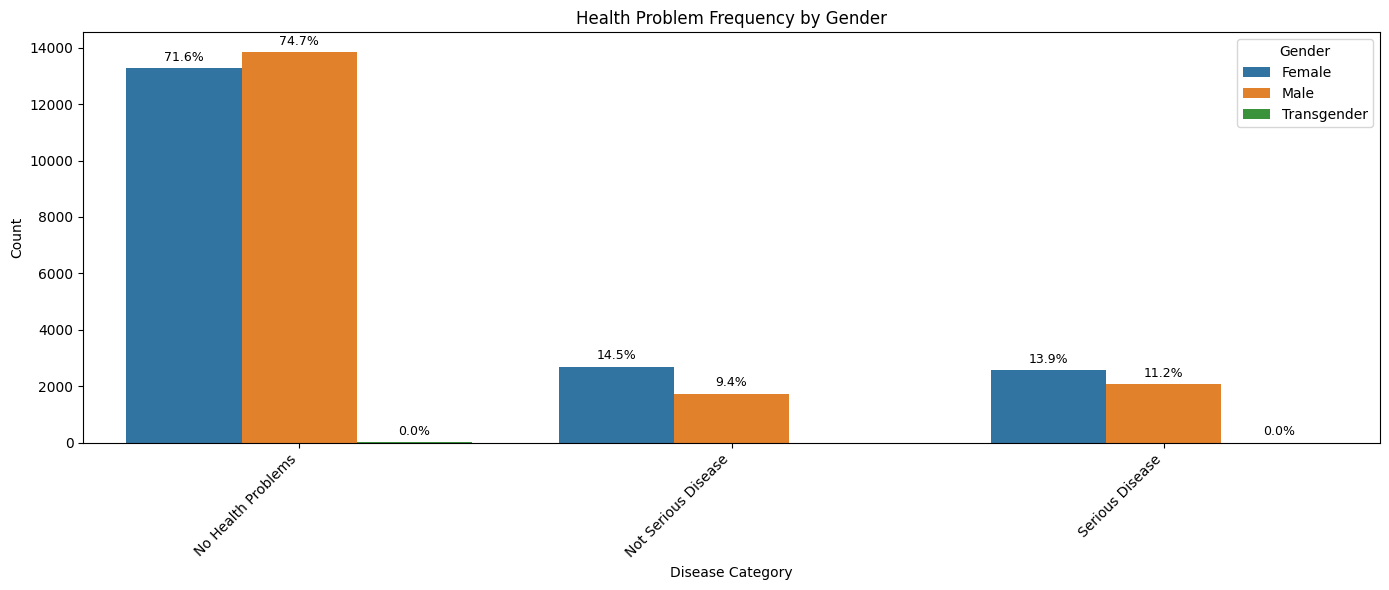

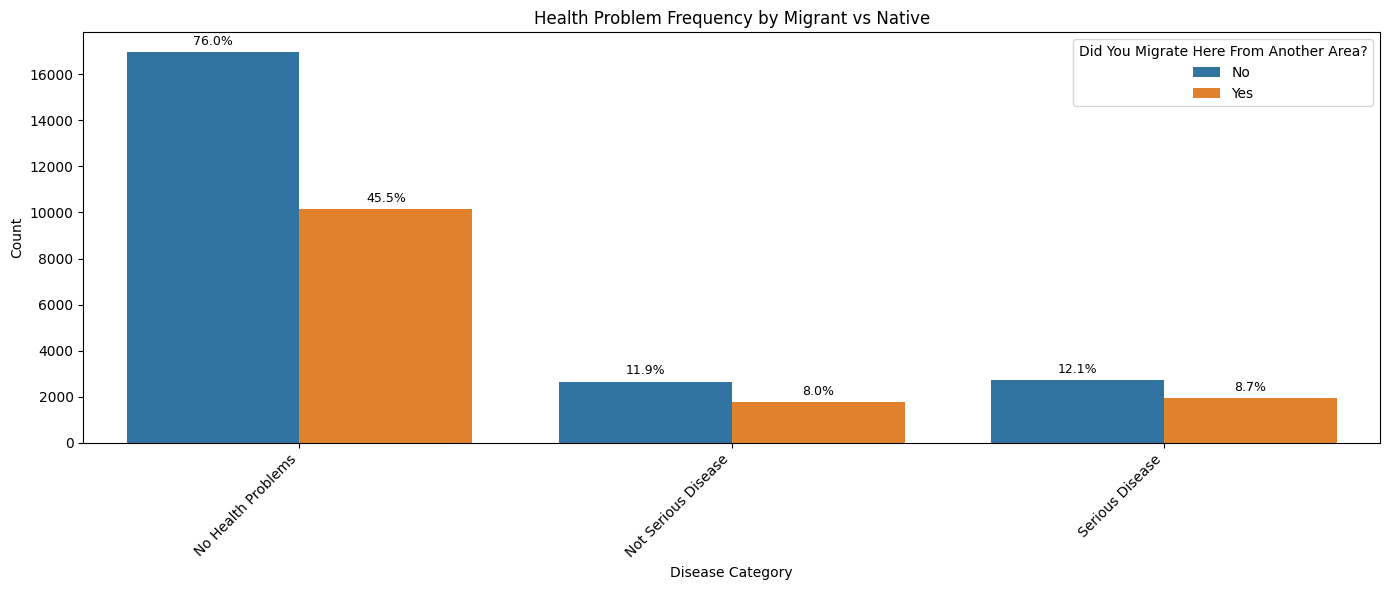

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Column names
disease_col = 'Are you suffering from any of the following diseases?  '
gender_col = 'Gender'
migrant_col = 'Did You Migrate Here From Another Area?'

# List of serious and not serious diseases
serious_diseases = ['Tuberculosis','Heart Disease', 'Brain Stroke','Tumor', 'Diabetes', 'High Blood Pressure/Hypertension (Not During Pregnancy and Recovery)', 'Stroke','Kidney Disease (Bladder and Kidney Problems)']  # Example list
not_serious_diseases = [ 'Anaemia', 'Asthma', 'Geriatric Diseases', 'The Amount of Cholesterol or Fat in the Blood is High','Less Vision in the Eyes/Any Eye Operation','Uterine Enlargement/Protrusion of Genitals','Piles','Malnutrition']  # Example list

# Add "No Health Problems" category
no_health_problems = 'No Health Problems'

# Helper function to categorize diseases
def categorize_diseases(disease):
    if disease in serious_diseases:
        return 'Serious Disease'
    elif disease in not_serious_diseases:
        return 'Not Serious Disease'
    else:
        return no_health_problems

# Split and categorize diseases
all_diseases = df[disease_col].dropna().str.split(';').explode().str.strip()
all_diseases = all_diseases.apply(categorize_diseases)

# Get the counts and percentages for the grouped diseases
disease_counts = all_diseases.value_counts()
disease_percentages = (disease_counts / disease_counts.sum()) * 100


# Helper function to split diseases
def explode_diseases(df, group_col):
    exploded = df[[group_col, disease_col]].dropna()
    exploded[disease_col] = exploded[disease_col].str.split(';')
    exploded = exploded.explode(disease_col)
    exploded[disease_col] = exploded[disease_col].str.strip()  # remove extra spaces
    return exploded

# ---- 1. By Gender ----
disease_by_gender = explode_diseases(df, gender_col)
disease_by_gender[disease_col] = disease_by_gender[disease_col].apply(categorize_diseases)
gender_counts = disease_by_gender.groupby([gender_col, disease_col]).size().reset_index(name='Count')
total_by_gender = gender_counts.groupby(gender_col)['Count'].transform('sum')
gender_counts['Percent'] = (gender_counts['Count'] / total_by_gender) * 100

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=gender_counts, x=disease_col, y='Count', hue=gender_col)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{(h/total_by_gender.iloc[i]):.1%}' for i, h in enumerate(container.datavalues)],
                 label_type='edge', fontsize=9, padding=3)
plt.title('Health Problem Frequency by Gender')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Disease Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ---- 2. By Migrant Status ----
disease_by_migrant = explode_diseases(df, migrant_col)
disease_by_migrant[disease_col] = disease_by_migrant[disease_col].apply(categorize_diseases)
migrant_counts = disease_by_migrant.groupby([migrant_col, disease_col]).size().reset_index(name='Count')
total_by_migrant = migrant_counts.groupby(migrant_col)['Count'].transform('sum')
migrant_counts['Percent'] = (migrant_counts['Count'] / total_by_migrant) * 100

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=migrant_counts, x=disease_col, y='Count', hue=migrant_col)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{(h/total_by_migrant.iloc[i]):.1%}' for i, h in enumerate(container.datavalues)],
                 label_type='edge', fontsize=9, padding=3)
plt.title('Health Problem Frequency by Migrant vs Native')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Disease Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


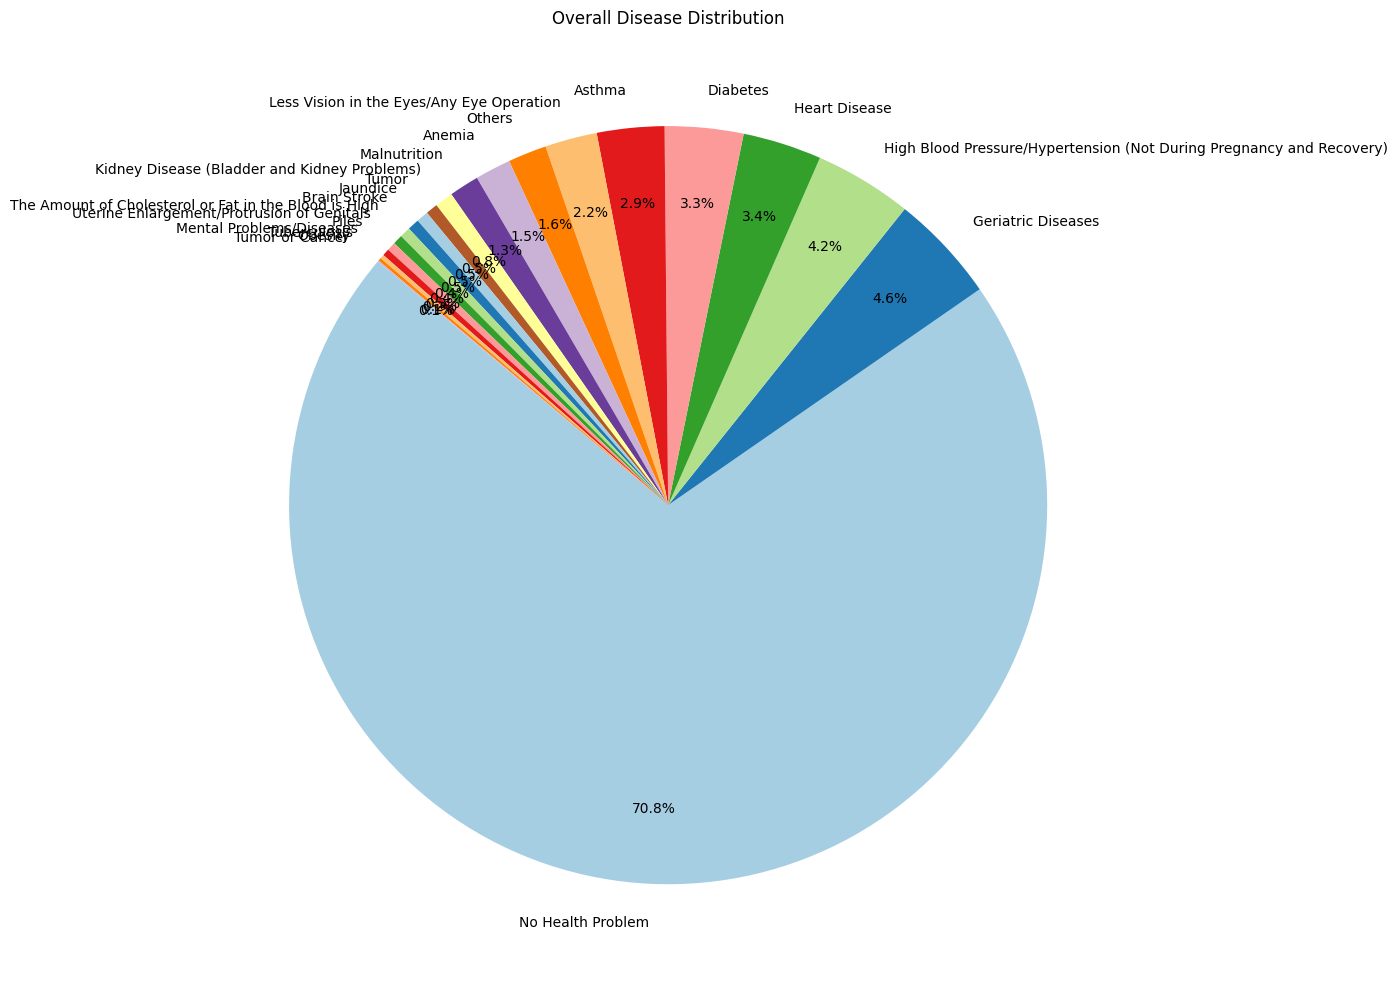

In [ ]:
# Combine gender and migrant for full disease distribution
all_diseases = df[disease_col].dropna().str.split(';').explode().str.strip()
disease_counts = all_diseases.value_counts()
disease_percentages = (disease_counts / disease_counts.sum()) * 100

# Pie chart
plt.figure(figsize=(15, 10))
plt.pie(
    disease_percentages.values,
    labels=disease_percentages.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.8,
    labeldistance=1.1,
    colors=plt.cm.Paired.colors
)
plt.title('Overall Disease Distribution')
plt.tight_layout()
plt.show()


In [ ]:


# Column names
disease_col = 'Are you suffering from any of the following diseases?   '
gender_col = 'Gender'
migrant_col = 'Did You Migrate Here From Another Area?'

# Helper function to split diseases
def explode_diseases(df, group_col):
    exploded = df[[group_col, disease_col]].dropna()
    exploded[disease_col] = exploded[disease_col].str.split(';')
    exploded = exploded.explode(disease_col)
    exploded[disease_col] = exploded[disease_col].str.strip()  # remove extra spaces
    return exploded

# ---- 1. Disease Frequency by Gender ----
disease_by_gender = explode_diseases(df, gender_col)
gender_counts = disease_by_gender.groupby([gender_col, disease_col]).size().reset_index(name='Count')

plt.figure(figsize=(14, 6))
sns.barplot(data=gender_counts, x=disease_col, y='Count', hue=gender_col)
plt.title('Health Problem Frequency by Gender')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ---- 2. Disease Frequency by Migrant Status ----
disease_by_migrant = explode_diseases(df, migrant_col)
migrant_counts = disease_by_migrant.groupby([migrant_col, disease_col]).size().reset_index(name='Count')

plt.figure(figsize=(14, 6))
sns.barplot(data=migrant_counts, x=disease_col, y='Count', hue=migrant_col)
plt.title('Health Problem Frequency by Migrant vs Native')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


C:\Users\88019\AppData\Local\Temp\ipykernel_12324\614344863.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df.groupby(['Age_Group', 'Gender']).size().unstack(fill_value=0)


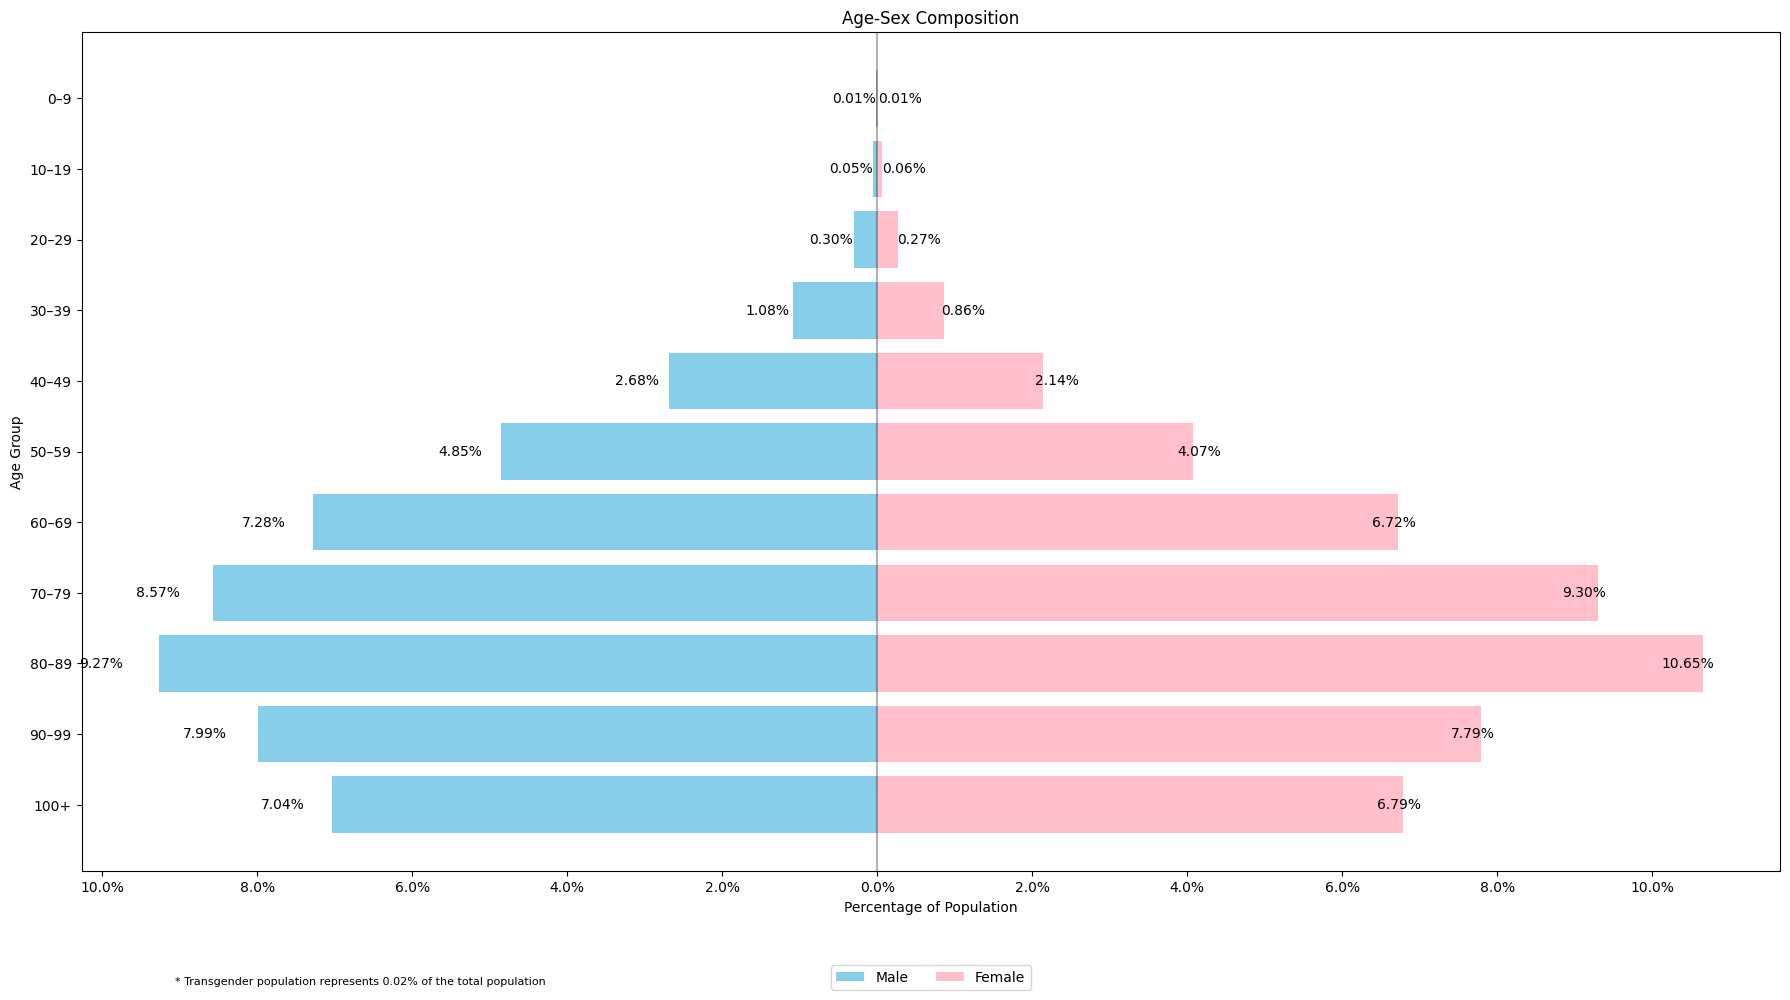

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define age bins and labels
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0–9', '10–19', '20–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80–89', '90–99', '100+']

# Categorize ages into bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Create age-gender distribution (percentage)
age_gender_counts = df.groupby(['', 'Gender']).size().unstack(fill_value=0)
total_population = len(df)
age_gender_pct = age_gender_counts / total_population * 100

# Separate male and female percentages
male_pct = age_gender_pct['Male'] if 'Male' in age_gender_pct.columns else age_gender_pct.iloc[:, 0]
female_pct = age_gender_pct['Female'] if 'Female' in age_gender_pct.columns else age_gender_pct.iloc[:, 1]

# Calculate transgender percentage for footnote
transgender_pct = 0
if 'Transgender' in age_gender_pct.columns:
    transgender_pct = age_gender_pct['Transgender'].sum()

# Create the population pyramid
fig, ax = plt.subplots(figsize=(18, 10))

# Use the age labels in reverse order (oldest at top)
y_pos = np.arange(len(labels))

# Plot male population (left side)
male_bars = ax.barh(y_pos, -male_pct, align='center', color='skyblue', label='Male')
for bar in male_bars:
    width = bar.get_width()
    ax.text(width * 1.05, bar.get_y() + bar.get_height()/2, f'{abs(width):.2f}%', ha='right', va='center')

# Plot female population (right side)
female_bars = ax.barh(y_pos, female_pct, align='center', color='pink', label='Female')
for bar in female_bars:
    width = bar.get_width()
    ax.text(width * 0.95, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', ha='left', va='center')

# Set y-ticks to age groups
ax.set_yticks(y_pos)
ax.set_yticklabels(labels[::-1])  # Reverse to have oldest at top

# Labels and styling
ax.set_xlabel('Percentage of Population')
ax.set_ylabel('Age Group')
ax.set_title('Age-Sex Composition')
ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Format x-axis
max_pct = max(max(abs(male_pct)), max(female_pct))
xtick_values = np.arange(0, max_pct + 1, max(1, int(max_pct / 5)))
ax.set_xticks(np.concatenate([-xtick_values[1:], xtick_values]))
ax.set_xticklabels([f'{abs(x)}%' for x in ax.get_xticks()])

# Add legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Add transgender footnote
plt.figtext(0.1, 0.01, f"* Transgender population represents {transgender_pct:.2f}% of the total population",
            fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

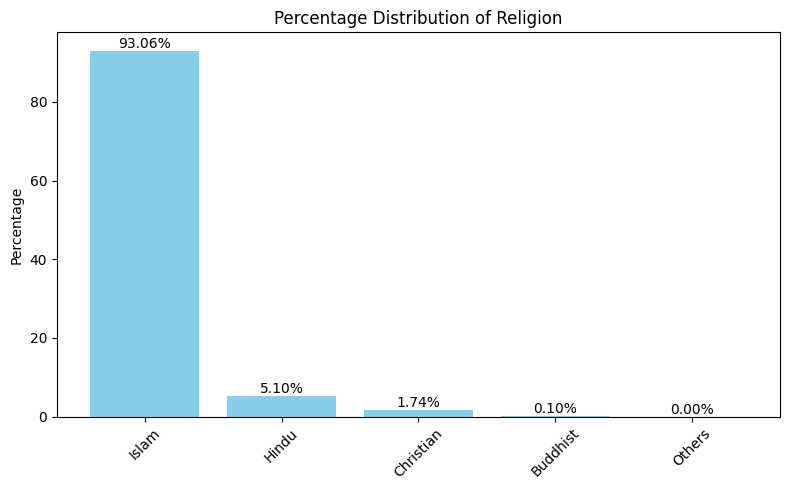

In [ ]:
col = 'Religion'


counts = df[col].value_counts(dropna=False)
percentages = (counts / counts.sum()) * 100

plt.figure(figsize=(8, 5))
bars = plt.bar(percentages.index.astype(str), percentages.values, color='skyblue')
plt.title(f'Percentage Distribution of {col}')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add labels on top
for bar, pct in zip(bars, percentages.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

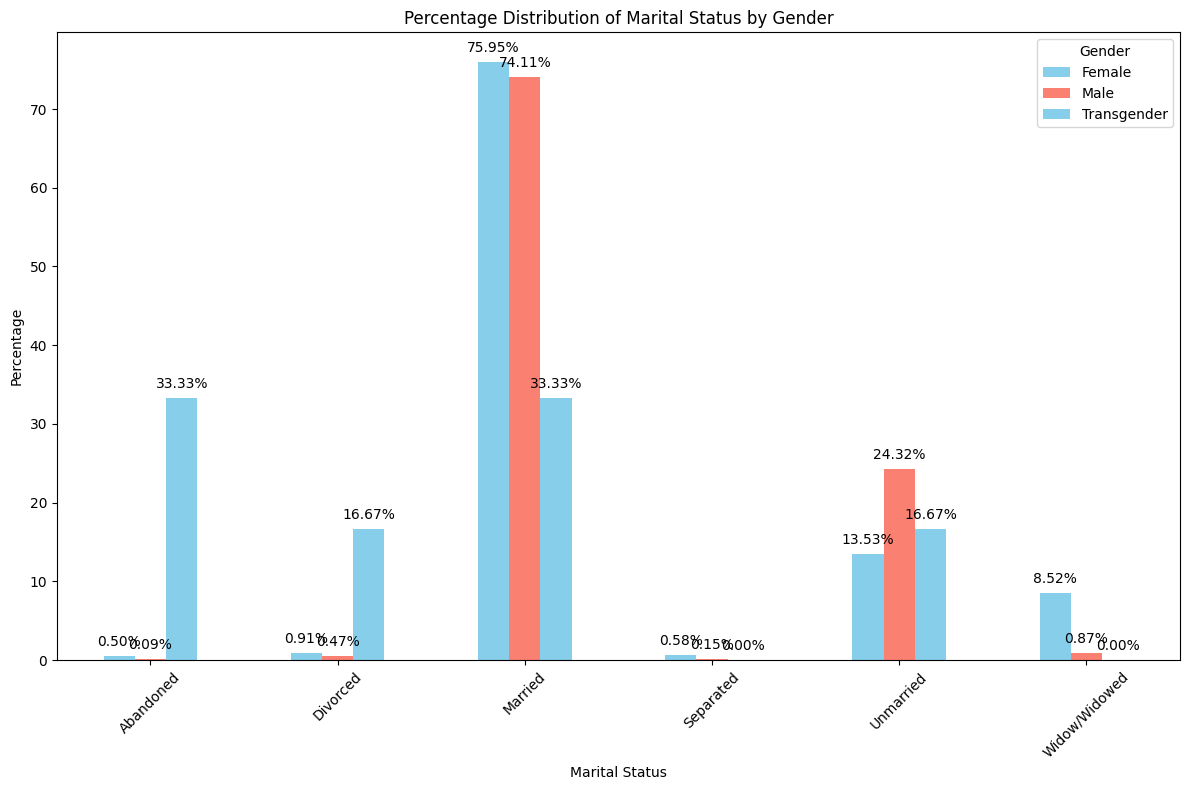

In [ ]:
col = 'Marital Status'
group_by = 'Gender'  # Change to None to disable grouping

if group_by:
    grouped = df.groupby([group_by, col]).size().unstack(fill_value=0)
    percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

    ax = percentages.T.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'salmon'])

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=5)

    plt.title(f'Percentage Distribution of {col} by {group_by}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title=group_by)
    plt.tight_layout()
    plt.show()
else:
    counts = df[col].value_counts(dropna=False)
    percentages = (counts / counts.sum()) * 100
    plt.figure(figsize=(8, 5))
    bars = plt.bar(percentages.index.astype(str), percentages.values, color='skyblue')
    plt.title(f'Percentage Distribution of {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    for bar, pct in zip(bars, percentages.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.2f}%', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

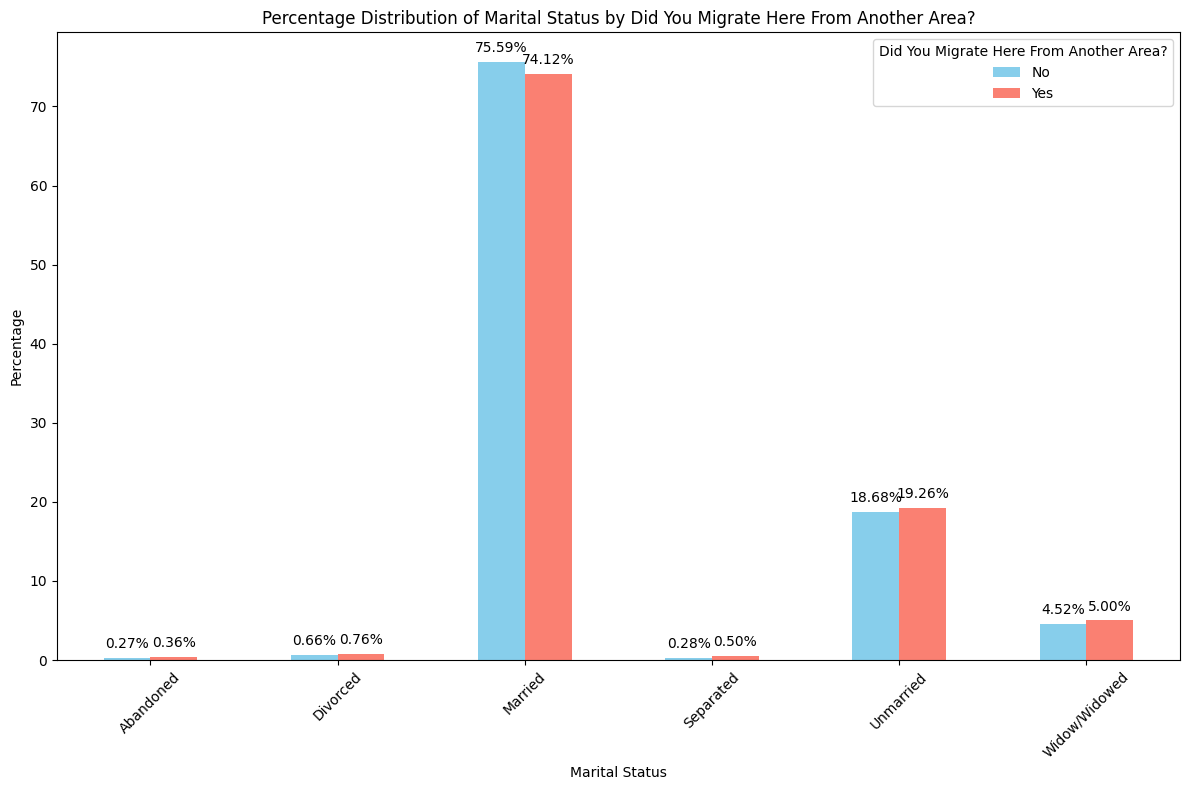

In [ ]:
col = 'Marital Status'
group_by = 'Did You Migrate Here From Another Area?'  # Change to None to disable grouping

if group_by:
    grouped = df.groupby([group_by, col]).size().unstack(fill_value=0)
    percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

    ax = percentages.T.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'salmon'])

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=5)

    plt.title(f'Percentage Distribution of {col} by {group_by}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title=group_by)
    plt.tight_layout()
    plt.show()
else:
    counts = df[col].value_counts(dropna=False)
    percentages = (counts / counts.sum()) * 100
    plt.figure(figsize=(8, 5))
    bars = plt.bar(percentages.index.astype(str), percentages.values, color='skyblue')
    plt.title(f'Percentage Distribution of {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    for bar, pct in zip(bars, percentages.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.2f}%', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

C:\Users\88019\AppData\Local\Temp\ipykernel_2784\2126997984.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = marital_status_df.groupby([group_by, col]).size().unstack(fill_value=0)


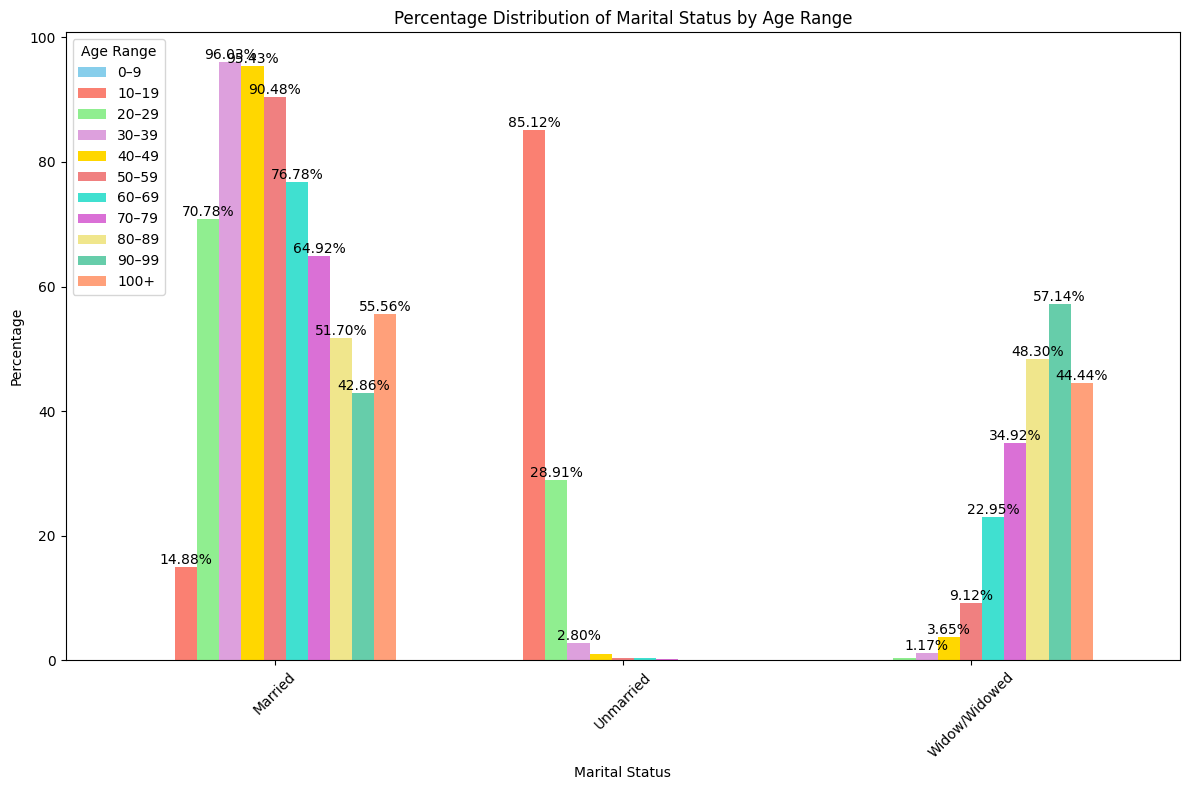

In [ ]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, float('inf')]
labels = ['0–9', '10–19', '20–29', '30–39', '40–49', '50–59',
          '60–69', '70–79', '80–89', '90–99', '100+']

df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

col = 'Marital Status'
group_by = 'Age Range'  # Change to None to disable grouping

marital_status_df = df[df[col].isin(['Married', 'Unmarried', 'Widow/Widowed'])]

if group_by:
    grouped = marital_status_df.groupby([group_by, col]).size().unstack(fill_value=0)
    percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

    ax = percentages.T.plot(kind='bar', figsize=(12, 8), color = [
    'skyblue', 'salmon', 'lightgreen', 'plum', 'gold',
    'lightcoral', 'turquoise', 'orchid', 'khaki', 'mediumaquamarine',
    'lightsalmon', 'cornflowerblue'
],width=0.7)

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height >= 1:  #Only show if 1% or more
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height,
                    f'{height:.2f}%',
                    ha='center',
                    va='bottom')

    plt.title(f'Percentage Distribution of {col} by {group_by}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title=group_by)
    plt.tight_layout()
    plt.show()
else:
    counts = df[col].value_counts(dropna=False)
    percentages = (counts / counts.sum()) * 100
    plt.figure(figsize=(15, 10))
    bars = plt.bar(percentages.index.astype(str), percentages.values, color='skyblue')
    plt.title(f'Percentage Distribution of {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    for bar, pct in zip(bars, percentages.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.2f}%', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

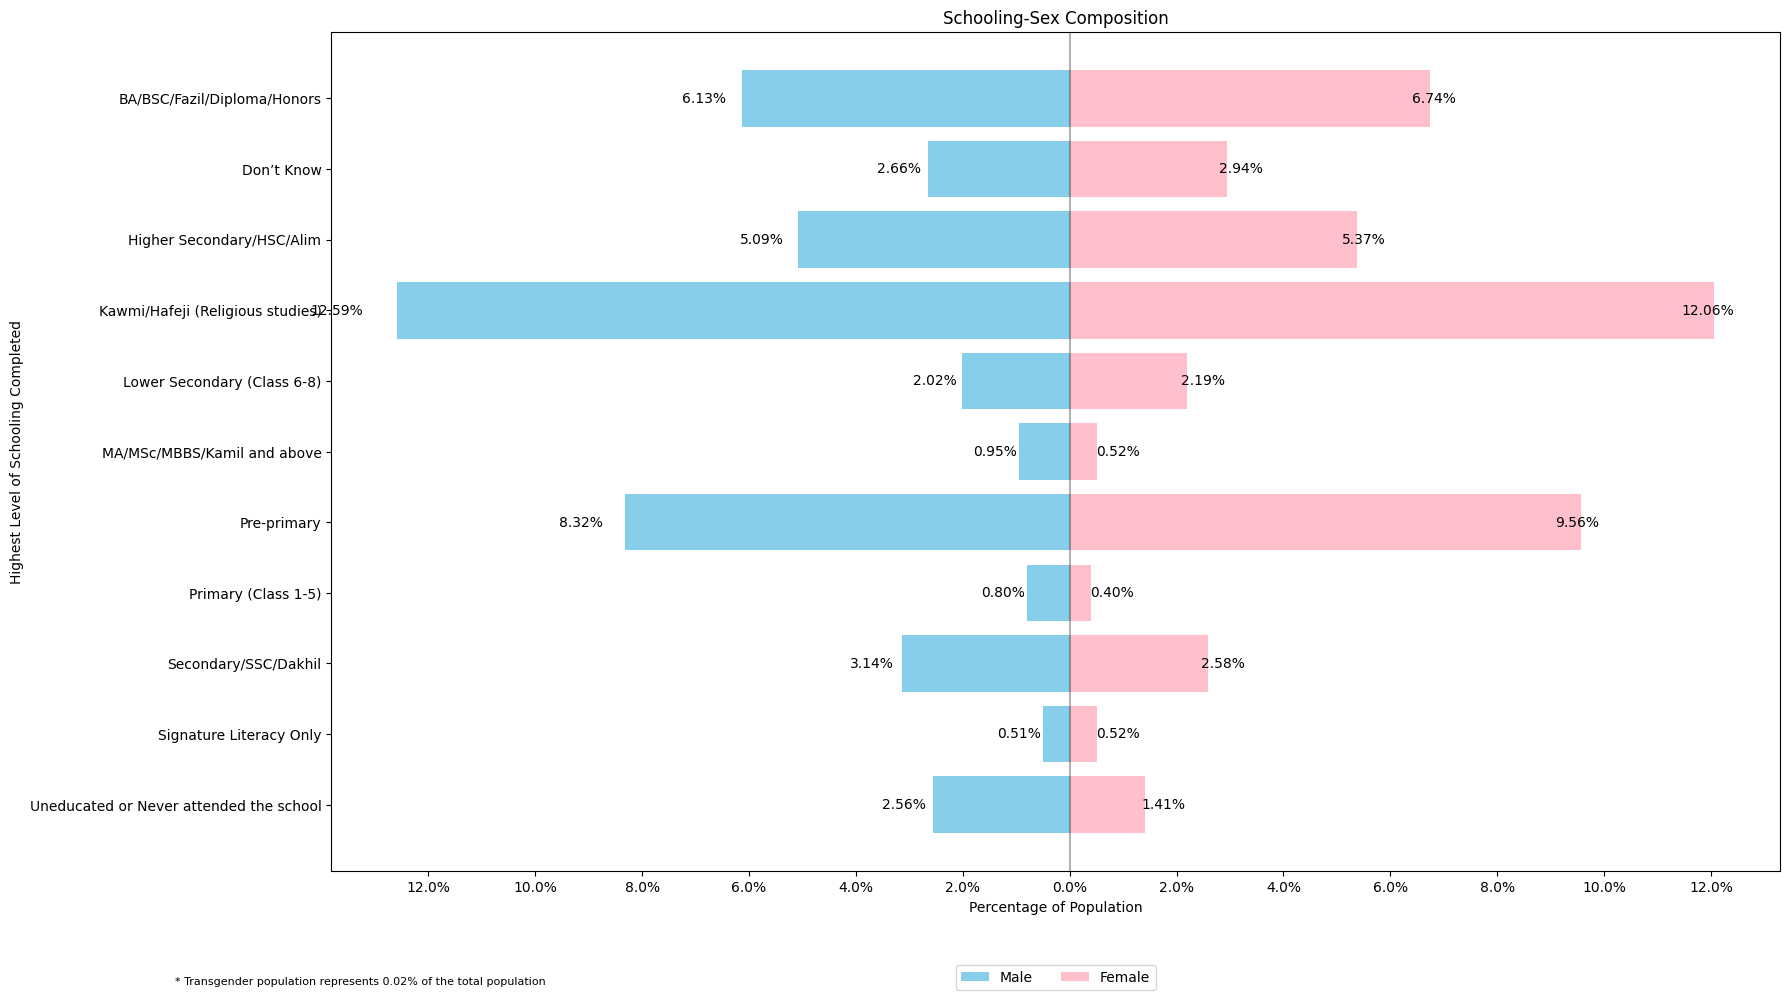

In [ ]:


# Create age-gender distribution (percentage)
age_gender_counts = df.groupby(['Highest Level of Schooling Completed', 'Gender']).size().unstack(fill_value=0)
total_population = len(df)
age_gender_pct = age_gender_counts / total_population * 100

# Separate male and female percentages
male_pct = age_gender_pct['Male'] if 'Male' in age_gender_pct.columns else age_gender_pct.iloc[:, 0]
female_pct = age_gender_pct['Female'] if 'Female' in age_gender_pct.columns else age_gender_pct.iloc[:, 1]

# Calculate transgender percentage for footnote
transgender_pct = 0
if 'Transgender' in age_gender_pct.columns:
    transgender_pct = age_gender_pct['Transgender'].sum()

# Create the population pyramid
fig, ax = plt.subplots(figsize=(18, 10))

# Use the age labels in reverse order (oldest at top)
y_pos = np.arange(len(labels))

# Plot male population (left side)
male_bars = ax.barh(y_pos, -male_pct, align='center', color='skyblue', label='Male')
for bar in male_bars:
    width = bar.get_width()
    ax.text(width * 1.05, bar.get_y() + bar.get_height()/2, f'{abs(width):.2f}%', ha='right', va='center')

# Plot female population (right side)
female_bars = ax.barh(y_pos, female_pct, align='center', color='pink', label='Female')
for bar in female_bars:
    width = bar.get_width()
    ax.text(width * 0.95, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', ha='left', va='center')

education_levels = age_gender_pct.index.tolist()
y_pos = np.arange(len(education_levels))

# Update axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(education_levels[::-1])  # Reverse order
ax.set_ylabel('Highest Level of Schooling Completed')

# Labels and styling
ax.set_xlabel('Percentage of Population')

ax.set_title('Schooling-Sex Composition')
ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Format x-axis
max_pct = max(max(abs(male_pct)), max(female_pct))
xtick_values = np.arange(0, max_pct + 1, max(1, int(max_pct / 5)))
ax.set_xticks(np.concatenate([-xtick_values[1:], xtick_values]))
ax.set_xticklabels([f'{abs(x)}%' for x in ax.get_xticks()])

# Add legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Add transgender footnote
plt.figtext(0.1, 0.01, f"* Transgender population represents {transgender_pct:.2f}% of the total population",
            fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

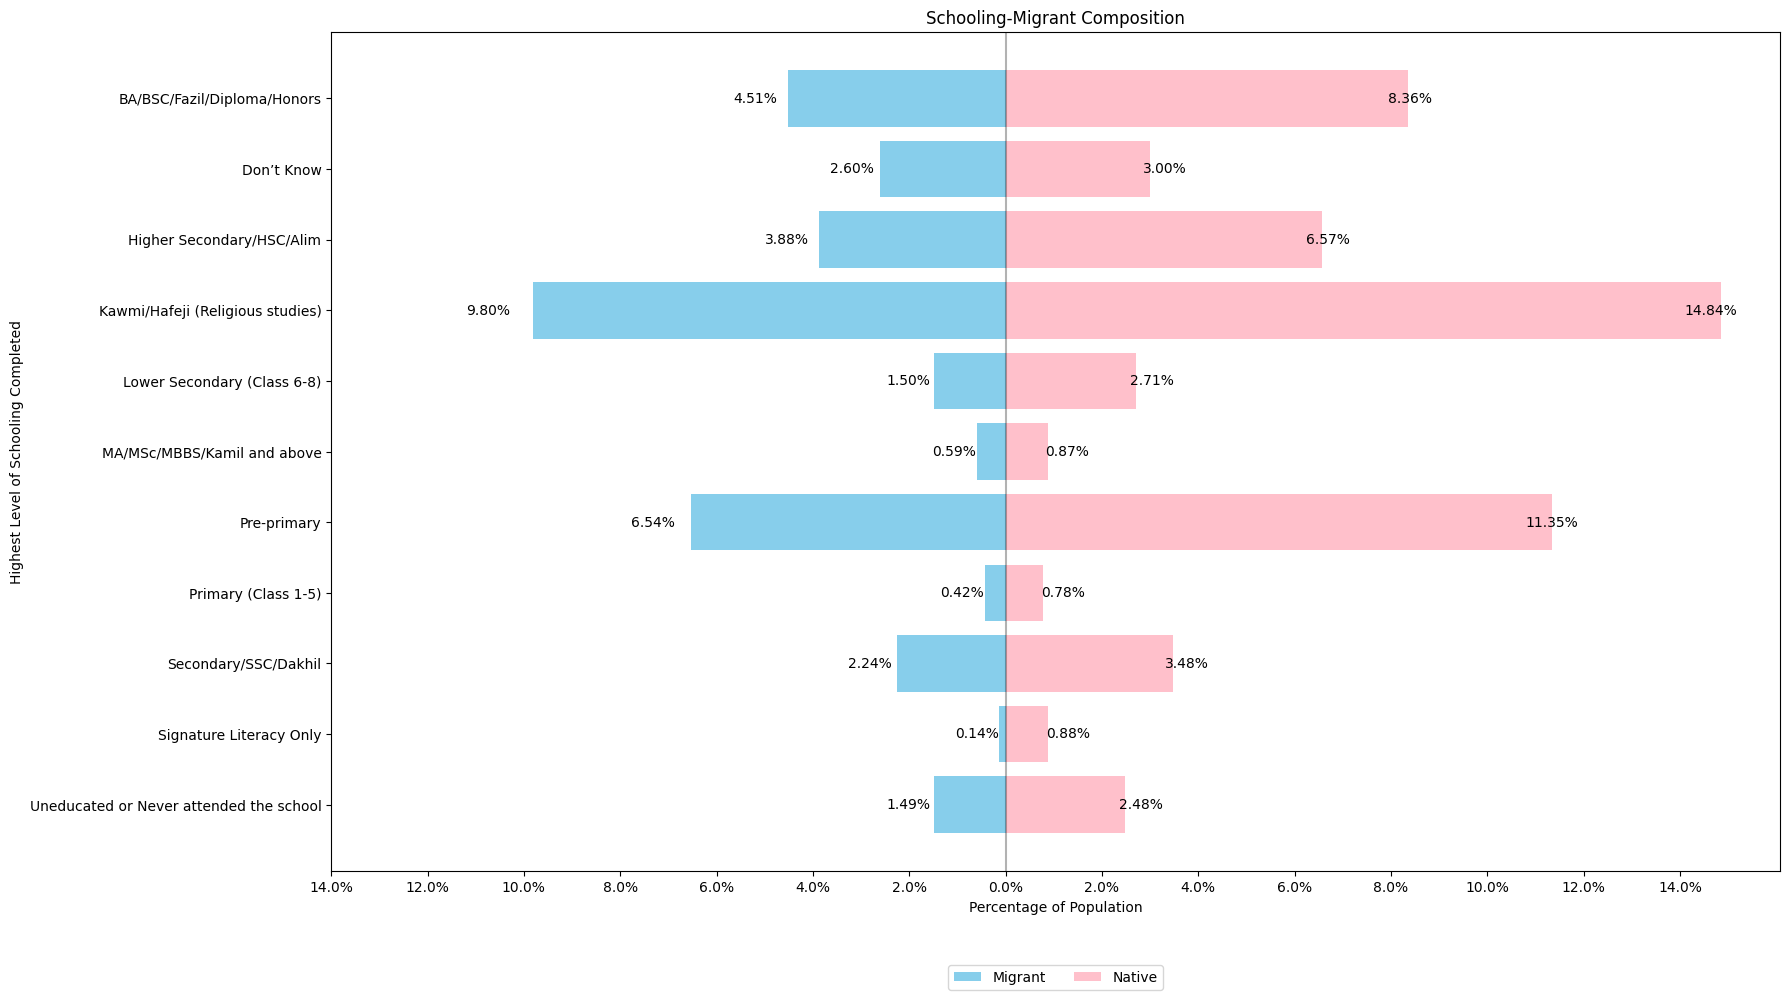

In [ ]:


# Create age-gender distribution (percentage)
age_gender_counts = df.groupby(['Highest Level of Schooling Completed', 'Did You Migrate Here From Another Area?']).size().unstack(fill_value=0)
total_population = len(df)
age_gender_pct = age_gender_counts / total_population * 100

# Separate male and female percentages
male_pct = age_gender_pct['Yes'] if 'Yes' in age_gender_pct.columns else age_gender_pct.iloc[:, 0]
female_pct = age_gender_pct['No'] if 'No' in age_gender_pct.columns else age_gender_pct.iloc[:, 1]

# Calculate transgender percentage for footnote
transgender_pct = 0
if 'Transgender' in age_gender_pct.columns:
    transgender_pct = age_gender_pct['Transgender'].sum()

# Create the population pyramid
fig, ax = plt.subplots(figsize=(18, 10))

# Use the age labels in reverse order (oldest at top)
y_pos = np.arange(len(labels))

# Plot male population (left side)
male_bars = ax.barh(y_pos, -male_pct, align='center', color='skyblue', label='Migrant')
for bar in male_bars:
    width = bar.get_width()
    ax.text(width * 1.05, bar.get_y() + bar.get_height()/2, f'{abs(width):.2f}%', ha='right', va='center')

# Plot female population (right side)
female_bars = ax.barh(y_pos, female_pct, align='center', color='pink', label='Native')
for bar in female_bars:
    width = bar.get_width()
    ax.text(width * 0.95, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', ha='left', va='center')
edu_gender_counts = df.groupby(['Highest Level of Schooling Completed', 'Gender']).size().unstack(fill_value=0)
edu_gender_pct = edu_gender_counts / len(df) * 100

# Use education levels as y-axis labels
education_levels = age_gender_pct.index.tolist()
y_pos = np.arange(len(education_levels))

# Update axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(education_levels[::-1])  # Reverse order
ax.set_ylabel('Highest Level of Schooling Completed')

# Labels and styling
ax.set_xlabel('Percentage of Population')

ax.set_title('Schooling-Migrant Composition')
ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Format x-axis
max_pct = max(max(abs(male_pct)), max(female_pct))
xtick_values = np.arange(0, max_pct + 1, max(1, int(max_pct / 5)))
ax.set_xticks(np.concatenate([-xtick_values[1:], xtick_values]))
ax.set_xticklabels([f'{abs(x)}%' for x in ax.get_xticks()])

# Add legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

In [ ]:
m_df = df[df.Gender =='Male']
f_df = df[df.Gender == 'Female']


# Plot horizontal bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

#male
axes[0].barh(m_df['Main Occupation'].astype(str),
            m_df['Composite_Score'], color='blue')
axes[0].set_title('Top 10 Best Performing Branches - Dabi')
axes[0].set_xlabel('Composite Performance Score')
axes[0].invert_yaxis()

#female
axes[1].barh(f_df['Main Occupation'].astype(str),
            f_df['Composite_Score'], color='pink')
axes[1].set_title('Top 10 Best Performing Branches - Progoti')
axes[1].set_xlabel('Composite Performance Score')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


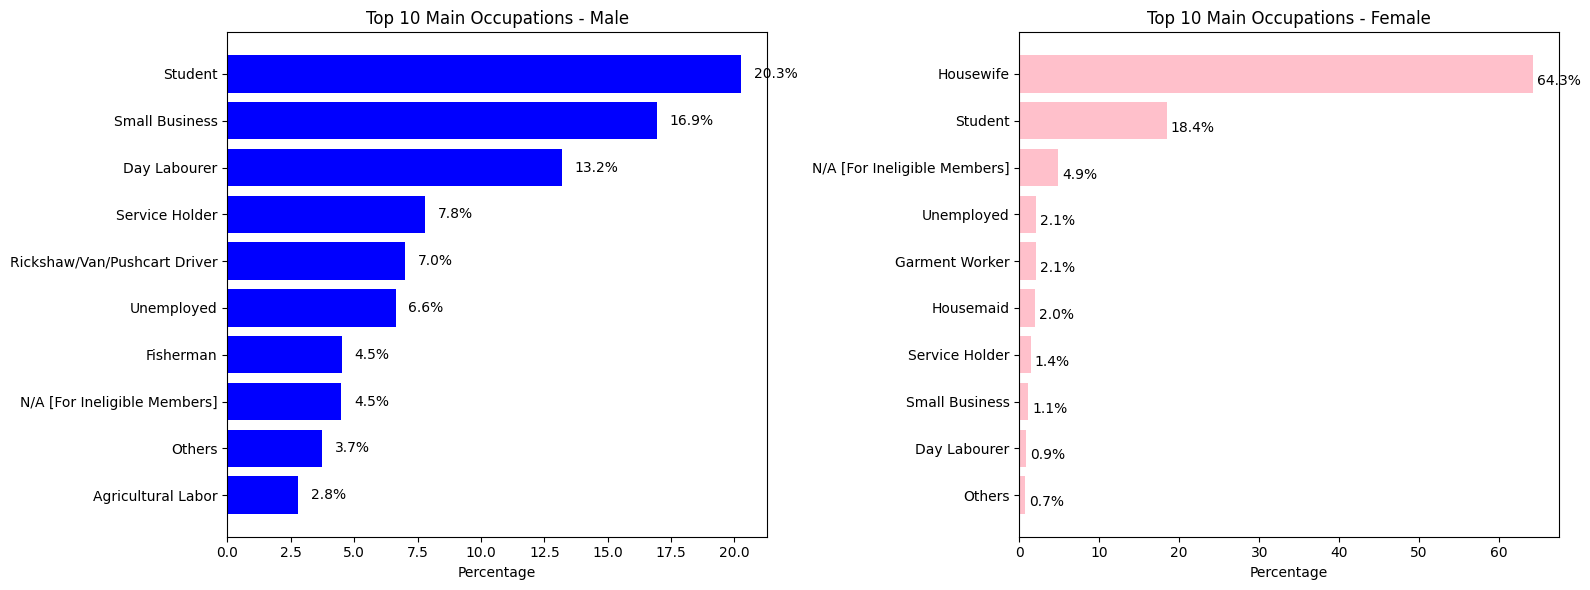

In [ ]:
m_df = df[df.Gender == 'Male']
f_df = df[df.Gender == 'Female']

# Calculate percentages (normalized within each gender group)
m_counts = m_df['Main Occupation'].value_counts(normalize=True) * 100
f_counts = f_df['Main Occupation'].value_counts(normalize=True) * 100

# Use top 10
m_counts = m_counts.head(10)
f_counts = f_counts.head(10)

# Plot horizontal bar charts side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Male
axes[0].barh(m_counts.index, m_counts.values, color='blue')
axes[0].set_title('Top 10 Main Occupations - Male')
axes[0].set_xlabel('Percentage')
axes[0].invert_yaxis()
for i, v in enumerate(m_counts.values):
    axes[0].text(v + 0.5, i, f'{v:.1f}%', va='center')


# Female
axes[1].barh(f_counts.index, f_counts.values, color='pink')
axes[1].set_title('Top 10 Main Occupations - Female')
axes[1].set_xlabel('Percentage')
axes[1].invert_yaxis()
for i, v in enumerate(f_counts.values):
    axes[1].text(v + 0.5, i, f'{v:.1f}%', va='top')

plt.tight_layout()
plt.show()


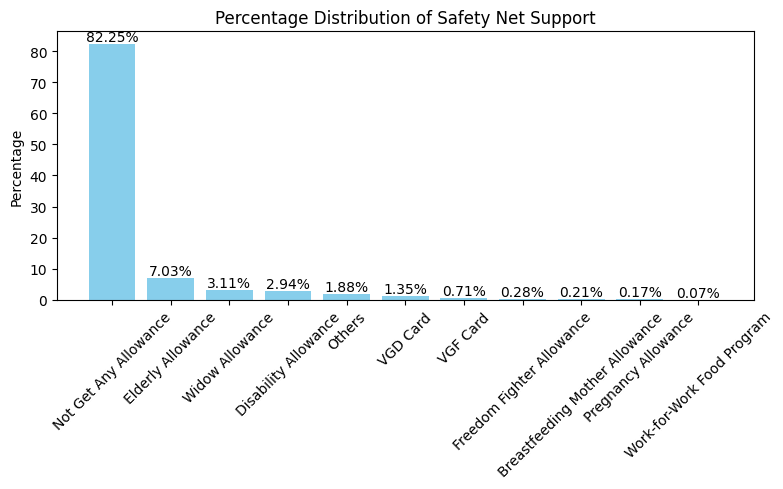

In [ ]:
col = 'Safety Net Support'
exploded = df[col].dropna().str.split(';').explode().str.strip()

# Calculate percentages
percentages = (exploded.value_counts(normalize=True) * 100).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
bars = plt.bar(percentages.index.astype(str), percentages.values, color='skyblue')
plt.title(f'Percentage Distribution of {col}')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add labels on top
for bar, pct in zip(bars, percentages.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
'Source of Household Income (Main Source)'


# Pivot table
heatmap_data = df.pivot_table(
    index='Safety Net Support',
    columns='Thana/Upazila',
    values='Household Monthly Income',
    aggfunc='mean'  # proportion of interested people
)

heatmap_display = heatmap_data / 1_000

# Plot
sns.heatmap(heatmap_data, annot=True, fmt=".1f",annot_kws={"fontsize":10},cmap="YlGnBu", cbar_kws={'label': 'Income'})
plt.title('')
plt.xlabel('Thana Upazila')
plt.ylabel('Migrant Status')
plt.show()


